## Importing the data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")

## Analyzing the data

<AxesSubplot:ylabel='Frequency'>

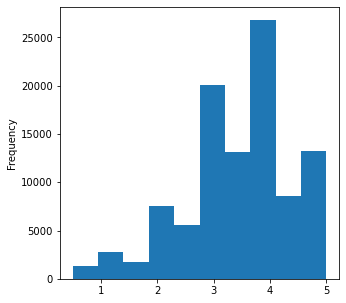

In [7]:
plt.figure(figsize=(5, 5))
ratings.rating.plot(kind="hist")

In [8]:
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<AxesSubplot:ylabel='rating'>

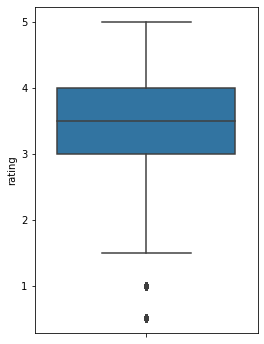

In [9]:
plt.figure(figsize=(4, 6))
sns.boxplot(y=ratings.rating)

In [10]:
ratings.query('movieId==1').rating.mean()

3.9209302325581397

In [11]:
ratings.query('movieId==2').rating.mean()

3.4318181818181817

In [12]:
mean_by_movie = ratings.groupby("movieId").mean().rating

In [13]:
mean_by_movie

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

<AxesSubplot:ylabel='Frequency'>

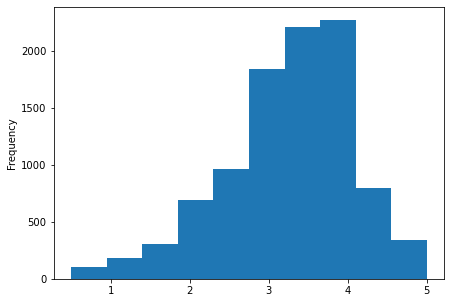

In [14]:
plt.figure(figsize=(7, 5))
mean_by_movie.plot(kind='hist')

In [15]:
mean_by_movie.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

<AxesSubplot:ylabel='rating'>

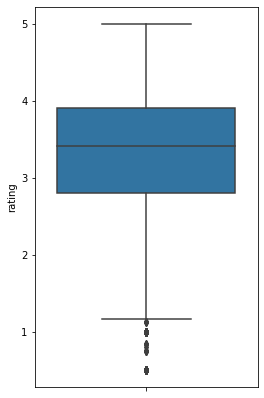

In [16]:
plt.figure(figsize=(4, 7))
sns.boxplot(y=mean_by_movie)

C:\Users\May\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

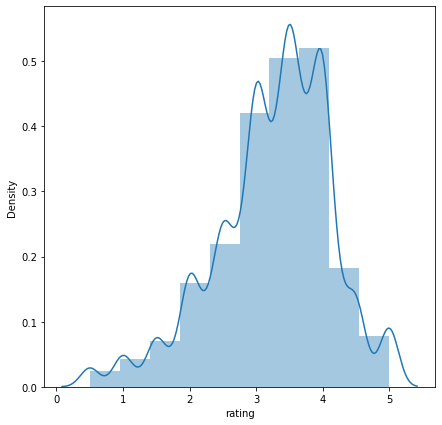

In [17]:
plt.figure(figsize=(7, 7))
sns.distplot(mean_by_movie, bins=10)

<AxesSubplot:xlabel='movieId', ylabel='rating'>

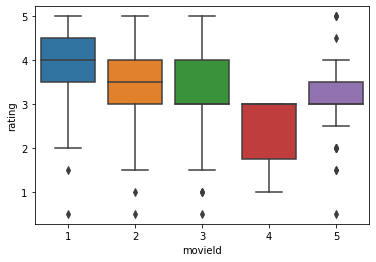

In [56]:
sns.boxplot(x = 'movieId', y = 'rating', data = ratings.query('movieId in (1, 2, 3, 4, 5)'))

## Analyzing the most used languages from another source

In [18]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")

In [19]:
language_count = tmdb.original_language.value_counts().to_frame().reset_index()
language_count.columns = ["original_language", "total"]
language_count.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

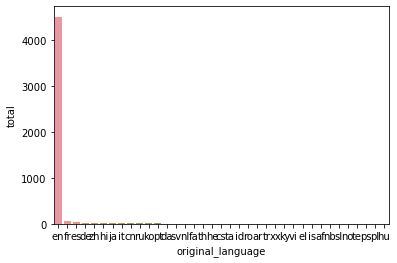

In [20]:
sns.barplot(x = "original_language", y = "total", data = language_count)

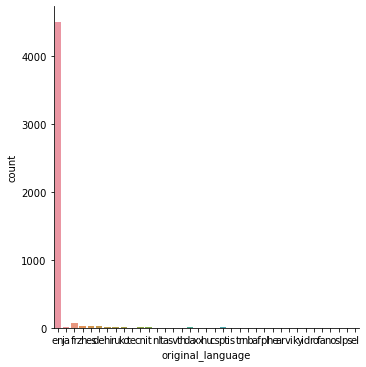

In [21]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

In [22]:
total_by_language = tmdb["original_language"].value_counts()
total_general = total_by_language.sum()
total_en = total_by_language.loc["en"]
total_others = total_general - total_en

In [23]:
data_language = {
    'language' : ['English', 'Others'],
    'total' : [total_en, total_others]
}
data_language = pd.DataFrame(data_language)

<AxesSubplot:xlabel='language', ylabel='total'>

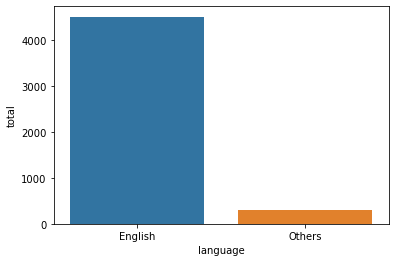

In [24]:
sns.barplot(x = 'language', y = 'total', data = data_language)

In [25]:
data_language_without_en = tmdb.query("original_language != 'en'")

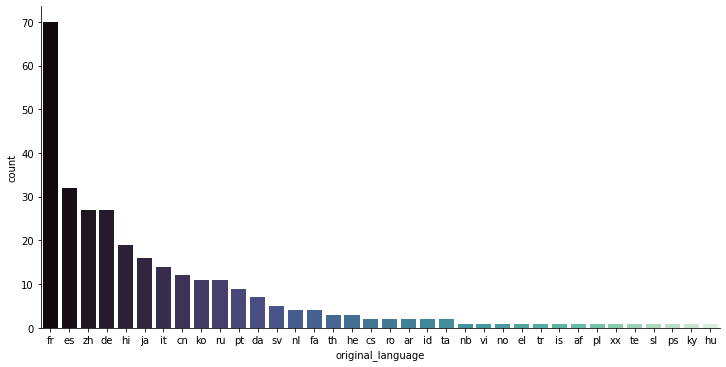

In [26]:
sns.catplot(x = 'original_language', kind = 'count', 
            data = data_language_without_en, 
            aspect = 2, palette = 'mako',
            order = data_language_without_en.original_language.value_counts().index)